In [7]:
import pandas as pd
import requests
import json

tv = requests.get("http://ApiPython.luisfelipechris.repl.co/Tv")
tv_dic = tv.json()
rd = requests.get("http://ApiPython.luisfelipechris.repl.co/Radio")
rd_dic = rd.json()
jn = requests.get("http://ApiPython.luisfelipechris.repl.co/Jornal")
jn_dic = jn.json()
vd = requests.get("http://ApiPython.luisfelipechris.repl.co/Vendas")
vd_dic = vd.json() 


tabela = {**tv_dic, **rd_dic, **jn_dic, **vd_dic}
df = pd.DataFrame(tabela)

display(df)
display(df.info())


,TV,Radio,Jornal,Vendas
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


<class 'pandas.core.frame.DataFrame'>
Index: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   TV      200 non-null    float64
 1   Radio   200 non-null    float64
 2   Jornal  200 non-null    float64
 3   Vendas  200 non-null    float64
dtypes: float64(4)
memory usage: 7.8+ KB


None

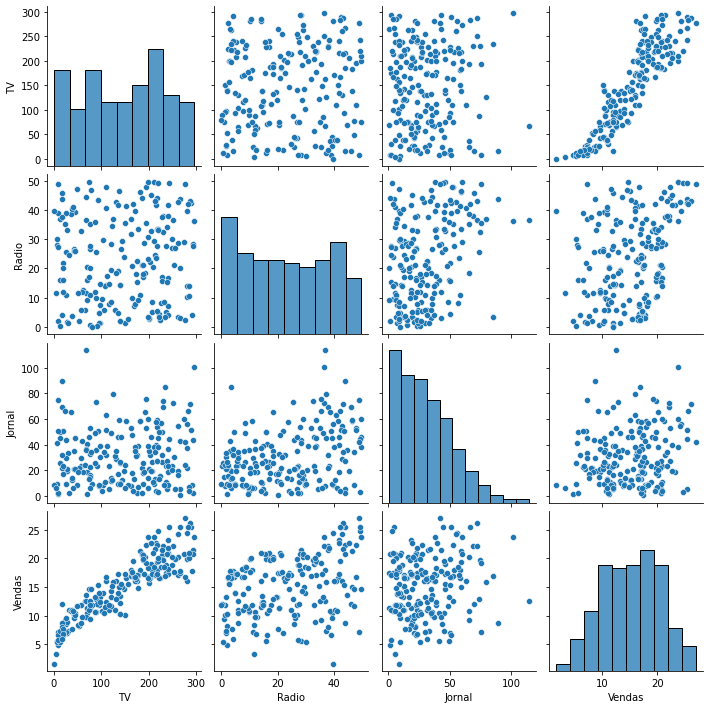

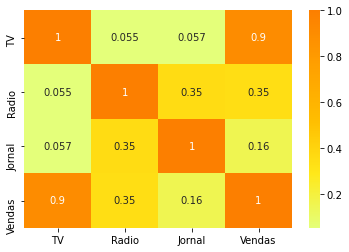

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(df)
plt.show()
sns.heatmap(df.corr(), cmap ='Wistia', annot =True)
plt.show()

In [9]:
from sklearn.model_selection import train_test_split
x = df.drop('Vendas', axis=1)
y = df['Vendas']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3)

In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor


# Criando IA
lin_reg = LinearRegression()
rf_reg = RandomForestRegressor()

# Treinando IA
lin_reg.fit(x_train, y_train)
rf_reg.fit(x_train, y_train)


RandomForestRegressor()

In [17]:
from sklearn import metrics
# teste AI
test_pred_lin = lin_reg.predict(x_test)
test_pred_rf = rf_reg.predict(x_test)

#R2
r2_lin = metrics.r2_score(y_test, test_pred_lin)
r2_rf= metrics.r2_score(y_test, test_pred_rf)
print(r2_lin, r2_rf)

# MSE
mse_lin = metrics.mean_squared_error(y_test, test_pred_lin)
mse_rf = metrics.mean_squared_error(y_test, test_pred_rf)
print(mse_lin, mse_rf)

0.8960312423266451 0.9588774201946453
3.163799331419073 1.2513719833333332


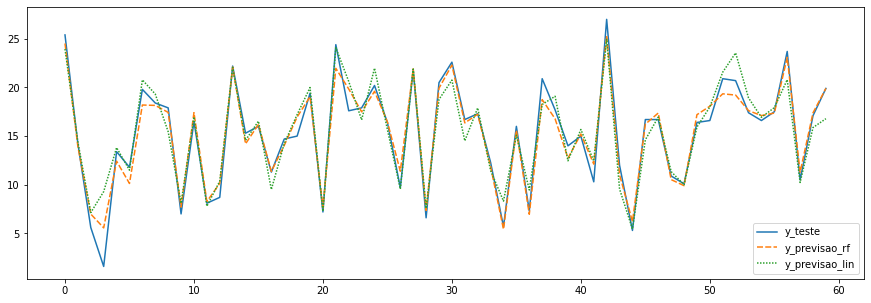

,y_teste,y_previsao_rf,y_previsao_lin
0,25.4,24.518,23.949285
1,14.2,13.921,14.391339
2,5.6,6.986,7.138943
3,1.6,5.566,9.294646
4,13.4,12.427,13.813514
5,11.8,10.130,11.498302
6,19.8,18.195,20.776516
7,18.4,18.154,19.320286
8,17.9,17.437,15.450754
9,7.0,7.701,8.093481


In [18]:
df_resultado = pd.DataFrame()

df_resultado['y_teste'] = y_test
df_resultado['y_previsao_rf'] = test_pred_rf
df_resultado['y_previsao_lin'] = test_pred_lin

df_resultado = df_resultado.reset_index(drop=True)
plt.figure(figsize=(15, 5))
sns.lineplot(data=df_resultado)
plt.show()
display(df_resultado)

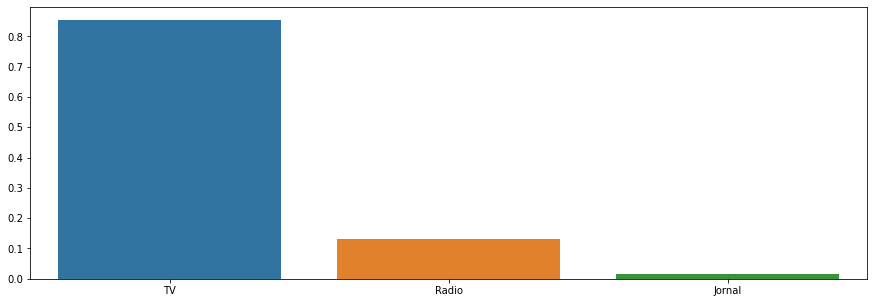

In [13]:

plt.figure(figsize=(15, 5))
sns.barplot(x=x_train.columns, y=rf_reg.feature_importances_)
plt.show()

In [15]:
print(df[['Radio','Jornal']].sum())

Radio     4652.8
Jornal    6110.8
dtype: float64


In [16]:
import numpy as np

k = np.array([[100, 20, 30], [500, 20, 30]])

test_pred_rf = rf_reg.predict(k)

print(test_pred_rf)

[12.368 20.354]
